In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt  


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

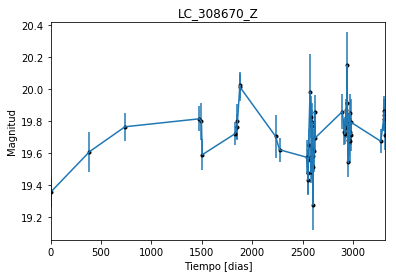

In [2]:
data = np.genfromtxt('LC_308670_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_308670_Z')
plt.savefig("LC_308670_Z.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

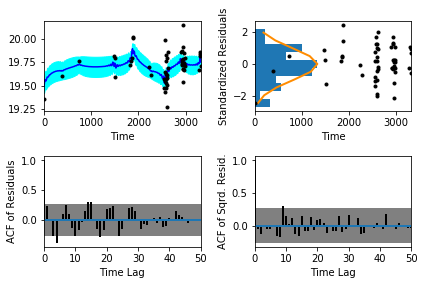

In [5]:
sample.assess_fit()

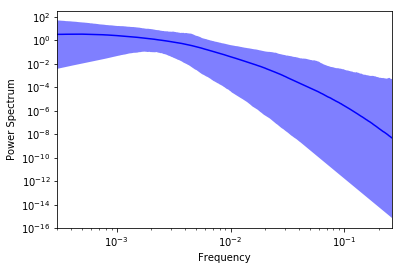

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

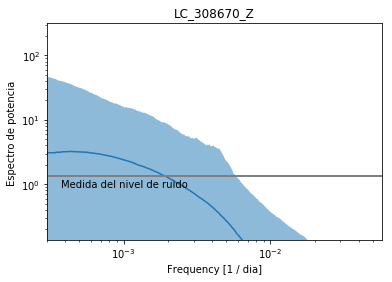

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_308670_Z')
plt.savefig("Medida del nivel de ruido_Z.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_308670_Z')

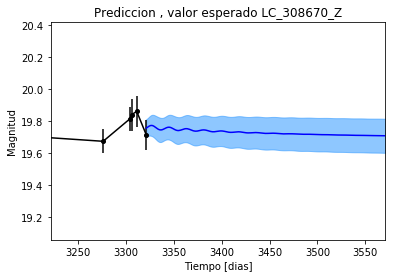

In [26]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_308670_Z')

Text(0.5,1,'Prediccion, Caminos simulados_LC_308670_Z')

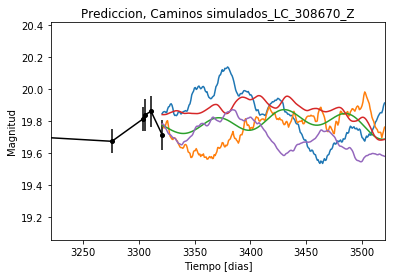

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_308670_Z')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


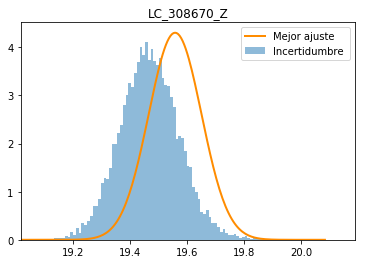

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_308670_Z')
plt.savefig("Mejor_ajuste_LC_308670_Z.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_308670_Z')

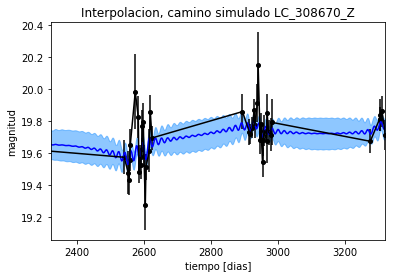

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_308670_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_308670_Z')

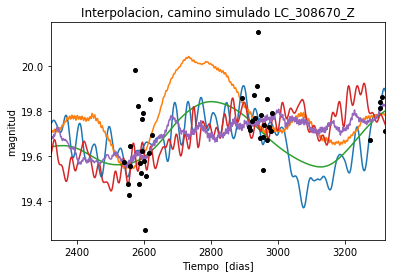

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_308670_Z')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 966.61916312
Median: 0.00805268111622
Standard deviation: 0.0971370156992
68% credibility interval: [ 0.00079561  0.09173335]
95% credibility interval: [  3.52419759e-04   3.88155194e-01]
99% credibility interval: [  3.09363653e-04   4.86572195e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 856.9318656
Median: 0.00289156509335
Standard deviation: 0.0540966733616
68% credibility interval: [ 0.00057414  0.02957834]
95% credibility interval: [ 0.00033466  0.18622356]
99% credibility interval: [  3.05836944e-04   3.71144230e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 709.138977268
Median: 0.0187132696641
Standard d

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1469.07158985
Median: 56.8560546088
Standard deviation: 1.61330753487
68% credibility interval: [ 55.06382595  57.98715408]
95% credibility interval: [ 52.48209183  58.64983361]
99% credibility interval: [ 50.60424646  59.17495937]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1080.09623949
Median: 0.476853529557
Standard deviation: 1.16794261636
68% credibility interval: [ 0.06208758  2.19071562]
95% credibility interval: [ 0.01521752  4.02600737]
99% credibility interval: [ 0.00961022  5.38329297]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 800.452704676
Median: 0.214806907959
Standard deviation: 2.57692944844
68% credibility interval: [ 0.01158828  2.75434796]
95% credibility interval: [  9.01234084e-0

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 13273.4657511
Median: 5.26712307657e-23
Standard deviation: 1.1897477261e+100
68% credibility interval: [  5.01911330e-73   8.91991769e+31]
95% credibility interval: [  1.94559669e-107   5.97708600e+086]
99% credibility interval: [  1.38609422e-129   7.41084043e+094]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2368.72295401
Median: 19.6953063538
Standard deviation: 0.0650110060466
68% credibility interval: [ 19.64059097  19.74208231]
95% credibility interval: [ 19.55228418  19.8100573 ]
99% credibility interval: [ 19.45388725  19.89640008]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 538.671450867
Median: 0.0202068425167
Standard deviation: 0.128067846274
68% credibility interval: [ 0.          0.20820963]
95% credibility interval: [ 0.          0.46182304]
99% credibility interval: [ 0.          0.50969226]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 538.671450867
Median: 0.0202068425167
Standard deviation: 0.128067846274
68% credibility interval: [ 0.          0.20820963]
95% credibility interval: [ 0.          0.46182304]
99% credibility interval: [ 0.          0.50969226]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 755.609871331
Median: 0.0
Standard deviation: 0.00228893205967
68% cre

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1469.07158985
Median: 56.8560546088
Standard deviation: 1.61330753487
68% credibility interval: [ 55.06382595  57.98715408]
95% credibility interval: [ 52.48209183  58.64983361]
99% credibility interval: [ 50.60424646  59.17495937]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1967.24371858
Median: 0.0209828434352
Standard deviation: 0.0313085707056
68% credibility interval: [ 0.01170873  0.04235205]
95% credibility interval: [ 0.00642277  0.10786561]
99% credibility interval: [ 0.00447727  0.19768586]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2463.15982557
Median: 1.12240840348
Standard deviation: 0.188187540238
68% credibility interval: [ 0.9605758   1.32638717]
95% credibility interval: [ 0.82596882  1.56185219]
99% credibility interval: [ 0.74141302  1.71118048]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 881.420863218
Median: 6.20114868096e-05
Standard deviation: 0.0429853442958
68% credibility interval: [  2.12307398e-35   3.44487996e-03]
95% credibility interval: [  3.10170330e-89   1.04066181e-01]
99% credibility interval: [  2.39756947e-100   3.25257862e-001]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 966.61916312
Median: (-0.0505964876728-0.0573615327822j)
Standard deviation: 1.00995188619
68% credibility interval: [-0.57637765-3.26088039j -0.00499897-0.83581523j]
95% credibility interval: [ -2.43885101e+00-0.43465622j  -2.21431865e-03-0.02658505j]
99% credibility interval: [ -3.05722327e+00+0.j          -1.94378916e-03-0.38096209j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 856.9318656
Median: (-0.0181682393093+0.997010023269j)
Standard deviation: 0.873516960529
68% credibility interval: [-0.18584616+0.12656231j -0.00360743+0.01701457j]
95% credibility interval: [-1.17007712+2.02293447j -0.00210274+0.16027543j]
99% credibility interval: [ -2.33196797e+00+1.70577725j  -1.92163019e-03+0.04993101j]
Posterior sum